In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF

In [3]:
rng = np.random. default_rng (10)
x1 = rng.uniform (0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

In [ ]:
"""
x1 coefficient = 2
x2 coefficient = 0.3 * 0.5 = 0.15
"""

In [7]:
df1 = pd.DataFrame({'x1':x1, 'x2':x2})

In [8]:
df1.corr()

,x1,x2
x1,1.000000,0.772324
x2,0.772324,1.000000


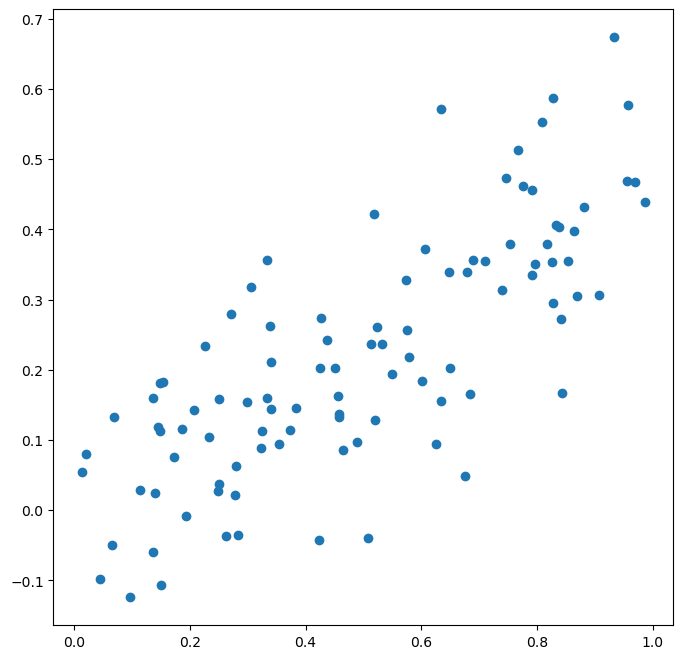

In [10]:
ax = plt.subplots(figsize = (8,8))[1]
ax.scatter(x1,x2)

In [14]:
df1 = sm.add_constant(df1)
model1 = sm.OLS(y, df1)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           5.76e-08
Time:                        10:37:41   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
const is almost same to the original b0
coefficients vary by almost 0.5
b2 (coefficient of x2) has high p value. reject the hypothesis that it has any effect
"""

In [18]:
model2 = sm.OLS(y, df1.drop(columns = ['x2']))
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           1.37e-08
Time:                        10:45:08   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
the coefficient of x1 cant be rejected as the p value is less
"""

In [19]:
model3 = sm.OLS(y, df1.drop(columns = ['x1']))
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           7.43e-07
Time:                        10:46:15   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
the coefficient of x2 cant be rejected as the p value is less
when the model if fit individually, the coefficients change and there is no enough evidence to accept the null hypothesis
"""

In [20]:
x1 = np. concatenate ([x1 , [0.1]])
x2 = np. concatenate ([x2 , [0.8]])
y = np. concatenate ([y, [6]])

In [24]:
df2 = pd.DataFrame({'x1':x1, 'x2':x2})
df2 = sm.add_constant(df2)

In [25]:
model4 = sm.OLS(y, df2)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           4.60e-08
Time:                        10:50:17   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model5 = sm.OLS(y, df2.drop(columns = ['x2']))
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           9.23e-07
Time:                        10:58:14   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model6 = sm.OLS(y, df2.drop(columns = ['x1']))
result6 = model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           3.13e-08
Time:                        10:58:44   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

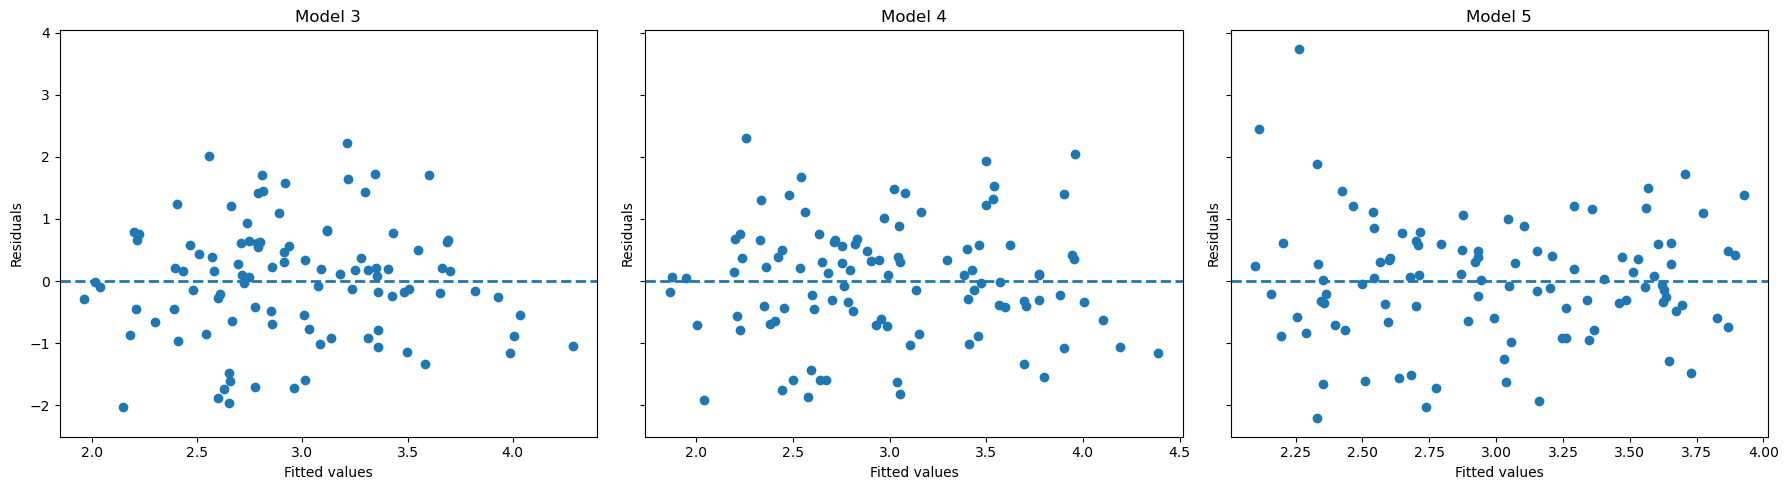

In [28]:
import matplotlib.pyplot as plt

models = {
    "Model 3": result3,
    "Model 4": result4,
    "Model 5": result5
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (name, res) in zip(axes, models.items()):
    ax.scatter(res.fittedvalues, res.resid)
    ax.axhline(0, linestyle='--', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("Residuals")

plt.tight_layout()
plt.show()


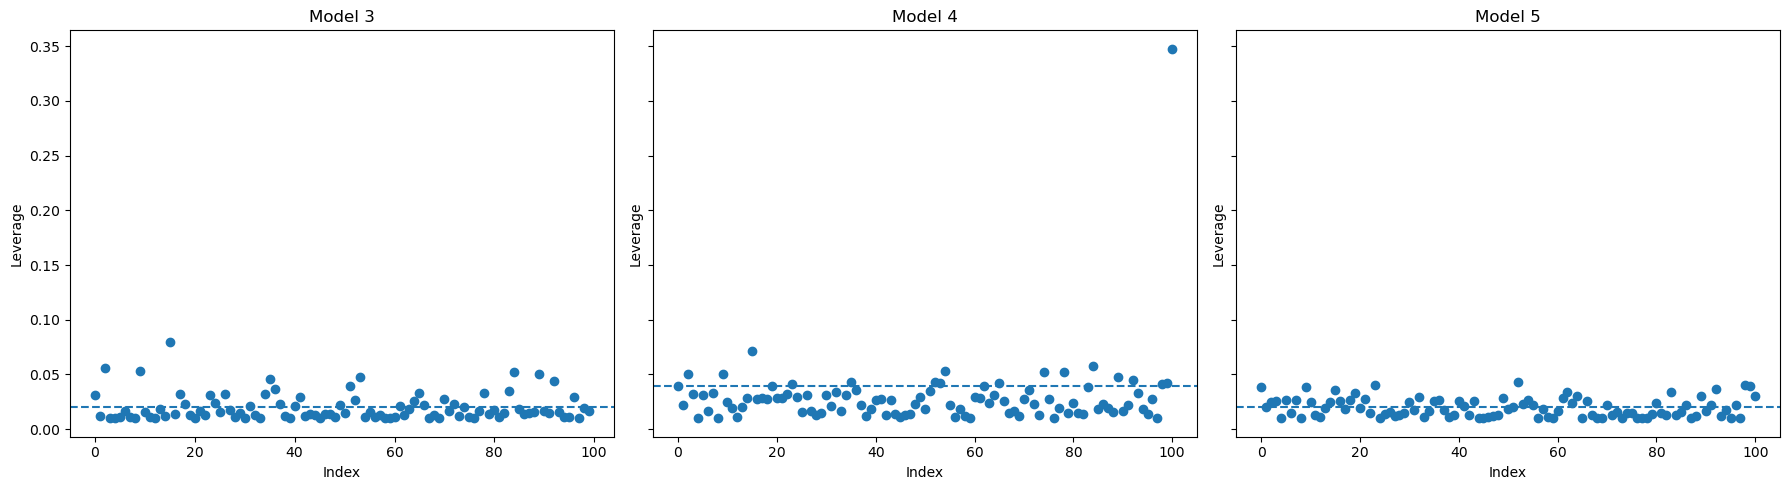

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

models = {
    "Model 3": result3,
    "Model 4": result4,
    "Model 5": result5
}

for ax, (name, res) in zip(axes, models.items()):
    infl = res.get_influence()
    h = infl.hat_matrix_diag

    ax.scatter(np.arange(len(h)), h)
    ax.set_title(name)
    ax.set_xlabel("Index")
    ax.set_ylabel("Leverage")
    ax.axhline(2 * res.df_model / len(h), linestyle="--")

plt.tight_layout()
plt.show()
